# Human Activity Recognition

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd

### Feature Name 데이터로부터 가져오기

In [3]:
feature_name_df = pd.read_csv('../00.data/UCI_HAR_Dataset/features.txt', sep='\s+',
                                header=None, names=['col_index','col_name'])
feature_name_df.head()

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
def get_new_feature_name_df(old_df):
    dup_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('col_name').cumcount()})
    new_df = pd.merge(old_df.reset_index(), dup_df.reset_index())
    new_df['col_name'] = new_df[['col_name', 'dup_cnt']].\
        apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_df = new_df.drop(['index'], axis=1)
    return new_df

In [5]:
new_feature_df = get_new_feature_name_df(feature_name_df)
new_feature_df.head()

,col_index,col_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [6]:
feature_list = list(new_feature_df.col_name.values)
feature_list[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

### X_train, X_test, y_train, y_test 데이터로부터 가져오기

In [7]:
X_train_df = pd.read_csv('../00.data/UCI_HAR_Dataset/train/X_train.txt', sep='\s+',header=None,names=feature_list)
X_train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [8]:
X_train = X_train_df.values
X_train

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [9]:
# X_test
X_test_df = pd.read_csv('../00.data/UCI_HAR_Dataset/test/X_test.txt', sep='\s+',header=None,names=feature_list)

# y_train
y_train_df = pd.read_csv('../00.data/UCI_HAR_Dataset/train/y_train.txt', sep='\s+',header=None,names=['action'])

# y_test
y_test_df = pd.read_csv('../00.data/UCI_HAR_Dataset/test/y_test.txt', sep='\s+',header=None,names=['action'])


In [10]:
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### DecisionTreeClassifier로 학습하고 예측하기

In [12]:
dt_clf = DecisionTreeClassifier(random_state=2021)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [13]:
pred_dt = dt_clf.predict(X_test)
accuracy_score(y_test,pred_dt)

0.8588394977943672

In [14]:
# DecisionTreeClassifier의 파라미터 확인
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2021,
 'splitter': 'best'}

### Feature 중요도구하기

In [15]:
dt_clf.feature_importances_

array([0.00000000e+00, 1.08837163e-04, 0.00000000e+00, 7.01687691e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.06446150e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.55074912e-04,
       0.00000000e+00, 0.00000000e+00, 9.05867305e-04, 1.08212261e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.16384481e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.32434076e-03, 0.00000000e+00, 3.92945107e-04,
       0.00000000e+00, 1.26303784e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.16397062e-03, 6.25209900e-03, 0.00000000e+00,
       2.39944712e-01, 3.77986285e-03, 5.58671245e-03, 1.58273360e-03,
      

In [16]:
len(dt_clf.feature_importances_)

561

In [17]:
new_feature_df['feature_importance_'] = dt_clf.feature_importances_

In [18]:
new_feature_df_sort = new_feature_df.sort_values(by='feature_importance_',ascending=False)
new_feature_df_sort

,col_index,col_name,dup_cnt,feature_importance_
52,53,tGravityAcc-min()-X,0,0.239945
389,390,"fBodyAccJerk-bandsEnergy()-1,16",0,0.201332
559,560,"angle(Y,gravityMean)",0,0.131643
508,509,fBodyAccMag-energy(),0,0.109366
74,75,"tGravityAcc-arCoeff()-Z,2",0,0.096173
...,...,...,...,...
212,213,tBodyAccMag-arCoeff()4,0,0.000000
211,212,tBodyAccMag-arCoeff()3,0,0.000000
210,211,tBodyAccMag-arCoeff()2,0,0.000000
207,208,tBodyAccMag-iqr(),0,0.000000


In [19]:
# 그래프로 표시하기
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

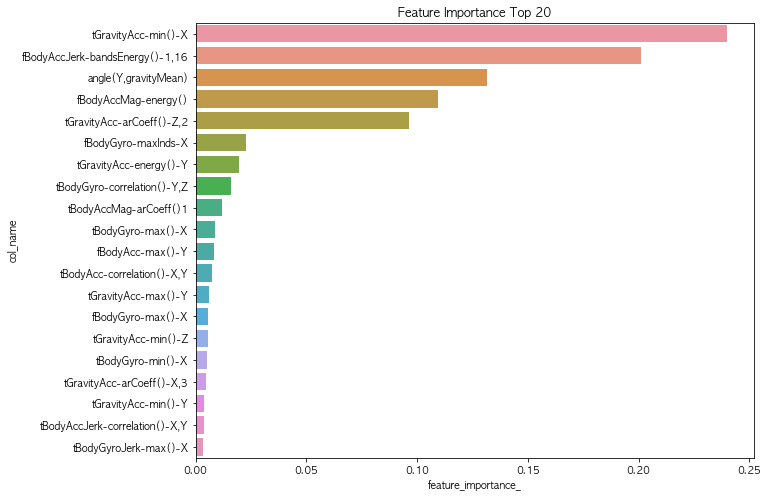

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(y="col_name", x="feature_importance_", data=new_feature_df_sort[:20])
plt.title("Feature Importance Top 20")
plt.show()

### GridSearchCV 이용해서 교차검증, 최적 하이퍼 파라미터 튜닝을 한번에

In [80]:
# 1차 시도
parameters = {
    'max_depth':[10,20,30,40],
    'min_samples_split':[5,10,15,20,25]
}

In [81]:
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)

In [82]:
grid_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             scoring='accuracy', verbose=1)

In [83]:
grid_dtree.best_params_

{'max_depth': 10, 'min_samples_split': 15}

In [84]:
grid_dtree.best_score_

0.8484888340108305

In [85]:
df = pd.DataFrame(grid_dtree.cv_results_)
df = df[['param_max_depth', 'mean_test_score']]
df

,param_max_depth,mean_test_score
0,10,0.847399
1,10,0.845357
2,10,0.848489
3,10,0.843317
4,10,0.847805
5,20,0.839374
6,20,0.841413
7,20,0.846174
8,20,0.844270
9,20,0.846583


In [86]:
# 2차 시도
parameters = {
    'max_depth':[2,4,6,8,10],
    'min_samples_split':[13,14,15,16,17]
}
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)
grid_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  7.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [13, 14, 15, 16, 17]},
             scoring='accuracy', verbose=1)

In [87]:
grid_dtree.best_params_

{'max_depth': 8, 'min_samples_split': 15}

In [88]:
df = pd.DataFrame(grid_dtree.cv_results_)
df = df[['param_max_depth', 'mean_test_score']]
df

,param_max_depth,mean_test_score
0,2,0.544614
1,2,0.544614
2,2,0.544614
3,2,0.544614
4,2,0.544614
5,4,0.838553
6,4,0.838553
7,4,0.838553
8,4,0.838553
9,4,0.838553


In [89]:
# 3차 시도
parameters = {
    'max_depth':[7,8,9],
    'min_samples_split':[14,15,16]
}
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)
grid_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [7, 8, 9],
                         'min_samples_split': [14, 15, 16]},
             scoring='accuracy', verbose=1)

In [90]:
grid_dtree.best_params_

{'max_depth': 8, 'min_samples_split': 15}

In [91]:
grid_dtree.best_score_

0.8528375809875275

In [65]:
grid_dtree.best_params_

{'max_depth': 4, 'min_samples_split': 1350}